In [1]:
# Importing the required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Bring in the dataset
df_train = pd.read_csv('train.csv')

In [3]:
# Checking the columns
df_train.columns.size

81

In [4]:
#Checking the head of the data 
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
#Checking the tail of the data
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


# Analysing 'SalePrice'

In [6]:
# descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

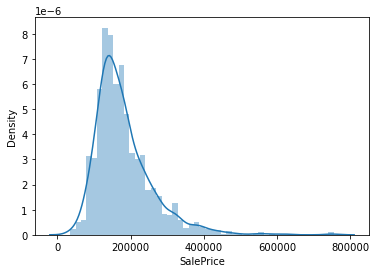

In [7]:
#  histogram

sns.distplot(df_train['SalePrice'])

In [8]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt() )

Skewness: 1.882876
Kurtosis: 6.536282


# Relationship with numerical variables

## GrLivArea/SalePrice

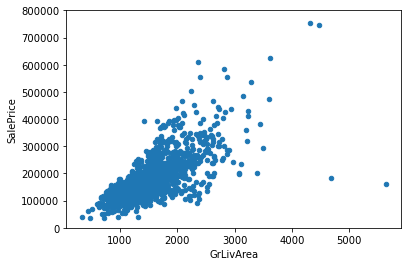

In [12]:
# scatter plot grLivearea/saleprice

var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
plot = data.plot.scatter(x = var, y = 'SalePrice', ylim=(0,800000))
plt.show(plot)

Positive linear relationship between SalePrice and GrLivArea

## TotalBsmtSF /SalePrice

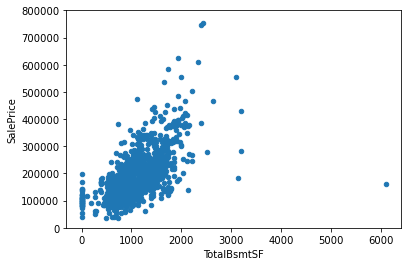

In [13]:
# scater plot totalbsmtsf/saleprice

var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
plot_two = data.plot.scatter(x = var, y = 'SalePrice', ylim=(0,800000))
plt.show(plot_two)

Strong linear relationship (exponential?)

## LotArea/SalePrice

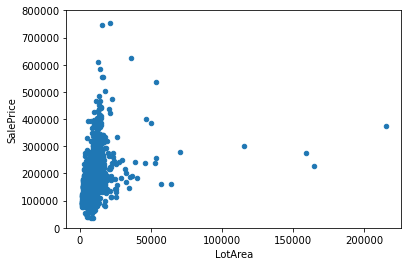

In [32]:
# scatter plot lotarea/saleprice

var = 'LotArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
plot_three = data.plot.scatter(x = var, y = 'SalePrice', ylim=(0,800000))
plt.show(plot_three)

No linear relationship between LotAre and Sale Price can be identified from the graph.

# Relationship with categorical features

## SalePrice and OverallQual

(-0.5, 9.5, 0.0, 800000.0)

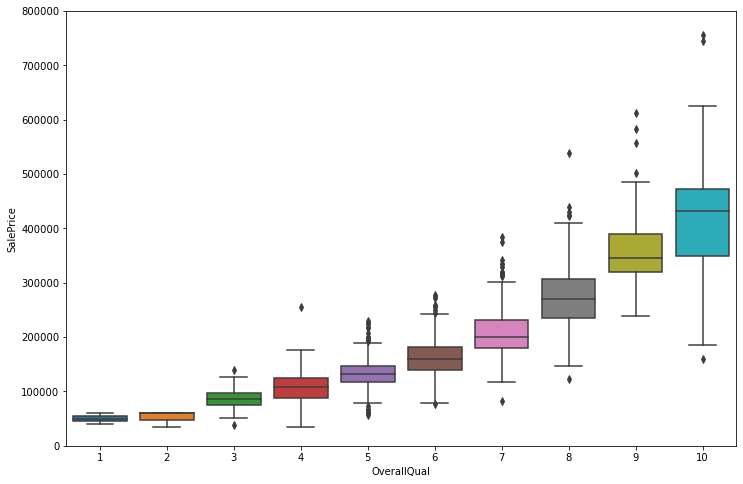

In [85]:
# box plot overallqual/saleprice

var = 'OverallQual'

data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f , ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)

Positive relationship with sale price and overallqual. The better the over all quality of the house, the higher the price.

## Sale Price and YearBuilt

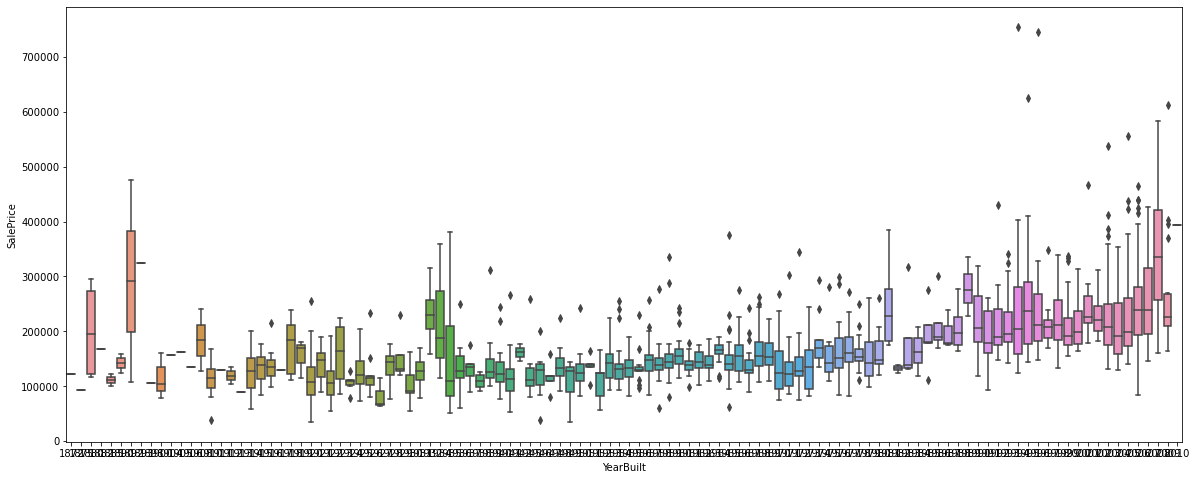

In [31]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

f, ax = plt.subplots(figsize=(20,8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)

No strong tendency between sale price and year built but newer houses are prone to having higher sale prices than older houses.

Note: we don't know if  sale price is in constant prices, constant prices try to remove the effect of inflation.

## In summary

We can conclude that:
 - GrLivArea',  and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSf', we can see that the slope of the linear relationship is particularly high.
  - 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sale prices increase with the overall quality.
  
  
    